### Question 1

In [11]:
## Importing all the necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split ## for splitting the datasets 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [1]:
import numpy as np  ## Once again importing a few more lbraries  
import pandas as pd ## numpy , pandas , matplotib
import matplotlib.pyplot as plt 
import seaborn as sns

np.random.seed(19680801) ## I just prefer to do this as this makes it easier to hold the data

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## reading the dataset
data = pd.read_csv('Computers.csv')

In [98]:
## loading the dataset
data

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


#### we can see that there are total 6259 rows and 11 columns.
####  We can clearly seee that the price is what we need to find out and we have given numerical data and   categorical 

In [99]:
## Checking for null values and data types
data.info()
## from info we can see that there is no null data and hence no need to fill it but we can't suggest that whether the 
# data is normalized or not but right now not focused on it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


#### As we have a unnecessary column, 'Unnamed: 0', i will remove it, moreover I will convert the object columns into numerical ones.
#### data is normalized or not but right now not focused on it 

In [100]:
## dropping unnamed because it is not necessary
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [101]:
## Checking the no. of unique values in each column
data.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

#### In this dataset, we have 10 columns, out of which we have price as dependent variable and rest like speed, hd, screen etc are independent variables.

In [3]:
### one hot encoding for converting object type variable to numerical variable
features = ['cd', 'multi', 'premium']
data_new = pd.get_dummies(data, columns = features, drop_first=True)
data_new.head()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1,1499,25,80,4,14,94,1,0,0,1
1,2,1795,33,85,2,14,94,1,0,0,1
2,3,1595,25,170,4,15,94,1,0,0,1
3,4,1849,25,170,8,14,94,1,0,0,0
4,5,3295,33,340,16,14,94,1,0,0,1


In [7]:
## Splitting the dataset into independent and dependent dataset
independent  = data_new.drop(['price'], axis = 1)
independent.head()

,Unnamed: 0,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1,25,80,4,14,94,1,0,0,1
1,2,33,85,2,14,94,1,0,0,1
2,3,25,170,4,15,94,1,0,0,1
3,4,25,170,8,14,94,1,0,0,0
4,5,33,340,16,14,94,1,0,0,1


In [8]:
dependent = data_new['price']
dependent.head()

0    1499
1    1795
2    1595
3    1849
4    3295
Name: price, dtype: int64

In [12]:
## Splitting the dataset into training(70%) and testing(30%)  
X_train, X_test, Y_train, Y_test = train_test_split(independent, dependent, test_size = 0.3, random_state = 1)

In [13]:
## Applying linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [107]:
## Predicting the price and displaying it
predict = model.predict(X_test)
predict

array([2204.0026496 , 2199.52614933, 2484.59273431, ..., 2534.53736323,
       1207.46140195, 1710.10853005])

In [110]:
## Calculating error as predicted price - actual price and displaying it
error = [a - b for a,b in zip(predict, Y_test)]
error

[-189.9973504045047,
 -194.47385067309278,
 -13.407265689658288,
 -199.44095917815912,
 -1096.21578445753,
 260.5745104484904,
 16.84256594992803,
 -143.480787784325,
 -303.44018628513277,
 -322.5333497780498,
 -138.8898864367161,
 113.38655806018096,
 124.6743823201814,
 271.75692450377574,
 105.85263243507825,
 249.74108783352267,
 75.60624160653424,
 268.977470179429,
 -29.168816823303132,
 -350.4542926015579,
 -208.43009151806564,
 -69.26380337403543,
 -300.63826648315217,
 -1084.7182413355936,
 -29.985877642367768,
 -196.90261600258327,
 -102.26579623791304,
 -173.5756041978466,
 43.387592711829484,
 220.84189567865883,
 289.5919940815977,
 -261.9991818102617,
 259.19926033482375,
 252.71550212889497,
 -71.084670265667,
 15.235706931327513,
 115.72984619758836,
 -8.060135615746503,
 280.51461339767775,
 -17.988747362602226,
 -303.664330884058,
 66.38412691304757,
 53.65597854518137,
 508.33874170426407,
 102.89894224659315,
 212.89835094832733,
 273.4040816157417,
 90.524338977198

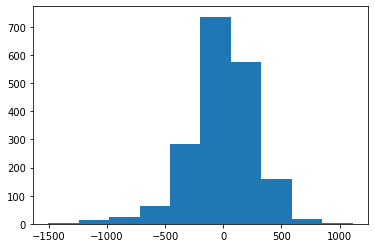

In [111]:
## plotting the histogram of the above mentioned error
plt.hist(error)
plt.show()

#### We can see that the frequency of cases with error in gthe vicinity of 0 is much higher.

In [112]:
print(' MSE for Linear Regression model is: ', mean_squared_error(Y_test,predict))

 MSE for Linear Regression model is:  80251.79985075784


In [115]:
count = 0
error = [abs(a - b)/a for a,b in zip(predict, Y_test)]
for i in range(len(Y_test)):
     if error[i]<= 0.2:
         count = count + 1
        
print('The precentage of cases which has less than 20% error is {}'.format((count/len(Y_test))*100))

The precentage of cases which has less than 20% error is 88.65814696485623


### Question 2

In [36]:
## reading and loading the dataset
data2 = pd.read_csv('yelp_lab8.csv')
data2.head()

,city,stars,review_count,categories
0,Toronto,0,12,Italian
1,Toronto,0,39,Pub
2,Toronto,1,3,Coffee or Sandwiches
3,Toronto,1,55,Middle Eastern
4,Markham,0,80,Asian


In [37]:
## Checking the no. of rows and columns of the dataset
data2.shape

(9219, 4)

In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          9219 non-null   object
 1   stars         9219 non-null   int64 
 2   review_count  9219 non-null   int64 
 3   categories    9219 non-null   object
dtypes: int64(2), object(2)
memory usage: 288.2+ KB


#### There are no null values in our dataset, and we have 2 columns of numerical and object type.

In [39]:
data2.describe() ## checking the descriptive data for numerical column 

,stars,review_count
count,9219.000000,9219.000000
mean,0.340492,39.705391
std,0.473901,67.982529
min,0.000000,3.000000
25%,0.000000,7.000000
50%,0.000000,17.000000
75%,1.000000,45.000000
max,1.000000,1494.000000


In [41]:
### one hot encoding
cat_features = ['city', 'categories']
data_new2 = pd.get_dummies(data2, columns = cat_features, drop_first=True)
data_new2.head()

,stars,review_count,city_Missisauga,city_Toronto,categories_Coffee or Sandwiches,categories_Fast Food,categories_Italian,categories_Latin,categories_Middle Eastern,categories_North American,categories_Other,categories_Pub
0,0,12,0,1,0,0,1,0,0,0,0,0
1,0,39,0,1,0,0,0,0,0,0,0,1
2,1,3,0,1,1,0,0,0,0,0,0,0
3,1,55,0,1,0,0,0,0,1,0,0,0
4,0,80,0,0,0,0,0,0,0,0,0,0


In [42]:
data2['city'].value_counts()

Toronto       7150
Missisauga    1309
Markham        760
Name: city, dtype: int64

In [43]:
## Splitting the dataset into independent and dependent dataset
Indep = data_new2.drop(['stars'], axis = 1)
dep = data_new2['stars']

In [44]:
## Splitting the dataset into training(70%) and testing(30%)
X_train, X_test, Y_train, Y_test  = train_test_split(Indep, dep, test_size = 0.3, random_state = 1)

In [45]:
## Apply logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ## need to find the analysis report to make it more clear 
lr = LogisticRegression()
lr.fit(X_train, Y_train)


LogisticRegression()

In [46]:
## predicting the values
lrpredict = lr.predict(X_test)


In [47]:
Y_test

8408    0
3953    1
1202    0
2588    0
1990    0
       ..
1256    1
1554    1
8183    1
2735    1
4717    1
Name: stars, Length: 2766, dtype: int64

In [48]:
lrpredict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
predict_data= pd.DataFrame({'Actual': Y_test , 'Predicted': lrpredict})
predict_data

,Actual,Predicted
8408,0,0
3953,1,0
1202,0,0
2588,0,0
1990,0,0
...,...,...
1256,1,0
1554,1,0
8183,1,0
2735,1,0


### Question 3

In [69]:
## loading and reading the data
data3 = pd.read_csv('Prostate_Cancer.csv')
data3.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [70]:
## checking the shape
data3.shape

(100, 10)

#### we can see that there are 10 columns in the dataset and 100 rows.


In [65]:
## dropping the id column
data3.drop(['id'],axis  =1, inplace = True)

In [66]:
## checking for null values
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


#### We can observe from the above picture that, there are no null values in our dataset.

In [73]:
## Performing 1 hot encoding to convert object  type data
data3 = pd.get_dummies(data3, columns = ['diagnosis_result'], drop_first=True)
data3.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
0,1,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [74]:
## performing normalization using minmax sclaer
from sklearn.preprocessing import MinMaxScaler

In [75]:
mx = MinMaxScaler()
normal_data = pd.DataFrame(mx.fit_transform(data3), columns=data3.columns)

In [76]:
normal_data

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
0,0.000000,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909,1.0
1,0.010101,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909,0.0
2,0.020202,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091,1.0
3,0.030303,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000,1.0
4,0.040404,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364,1.0
...,...,...,...,...,...,...,...,...,...,...
95,0.959596,0.8750,0.3125,0.666667,0.633652,0.287671,0.302932,0.443787,0.068182,1.0
96,0.969697,0.8125,0.1875,0.216667,0.148568,0.479452,0.107492,0.325444,0.295455,0.0
97,0.979798,0.6250,1.0000,0.083333,0.055489,0.438356,0.048860,0.000000,0.363636,0.0
98,0.989899,0.7500,0.8125,0.183333,0.125895,0.273973,0.120521,0.159763,0.295455,0.0


In [77]:
## dropping id column
normal_data.drop(['id'], axis = 1, inplace = True)

In [78]:
## Splitting the dataset into independent and dependent features
X = normal_data.drop(['diagnosis_result_M'], axis= 1)
X.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


In [79]:
Y = normal_data['diagnosis_result_M']
Y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: diagnosis_result_M, dtype: float64

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)


In [82]:
## Apply KNN algorithm on our data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'euclidean')


In [83]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
knnpredict = knn.predict(X_test)
knnpredict

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.])

In [86]:
from sklearn.metrics import classification_report
clc = classification_report(Y_test, knnpredict)
print(clc)

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.85      0.89      0.87        19

    accuracy                           0.83        30
   macro avg       0.82      0.81      0.82        30
weighted avg       0.83      0.83      0.83        30



#### From confusion matrix, we can observe that, the overall accuracy is above 80%. Moreover, diving deeper into the the report, the precision and recall values for 0 are 80% and 73%, similarly for category 1 is 85% and 89%. Hence I can conclude that our model is performing good.